# **Técnicas de Monte Carlo (TMON) - Intervalos de confianza**

MUTECI 2023/2024

Andrés Herencia López-Menchero

## Ejercicio 1
Genera $10^4$ muestras de valores $\text{U}(0, \Theta = 1)$ de tamaño $100$, y construir a partir de ellas $10^4$ intervalos de confianza.

In [1]:
import numpy as np

N = 10**4
n = 100
theta = 1
alpha = 0.05
ic, contained = [], []

for i in range(N):
    sample = np.random.uniform(0, theta, size=100)
    ic.append([max(sample), max(sample) / pow(alpha,1/n) ])
    if (theta > ic[i][1] or theta < ic[i][0]):
        contained.append(False) 
    else:
        contained.append(True)

Una forma alternativa de crear una muestra uniforme de datos sin usar las clásicas `pre-built` functions sería usar el método de congruencias finitas. Aunque el coste computacional se eleva enormemente.

In [2]:
import time
import pandas as pd

def uniform_dist_congr(seed = float(time.time()), a=5, b=3, m=16, size=10):
    """
    Generates a sequence of pseudo-random numbers using a linear congruential 
    generator.

    Parameters:
    - seed (float): The seed value for the generator. Default is the current 
    timestamp.
    - a (int): Multiplier in the linear congruential formula. Default is 5.
    - b (int): Increment in the linear congruential formula. Default is 3.
    - m (int): Modulus in the linear congruential formula. Default is 16.
    - size (int): Number of pseudo-random numbers to generate. Default is 10.

    Returns:
    pandas.DataFrame: A DataFrame containing the generated pseudo-random numbers.
    The DataFrame has columns 'i' (iteration index), 'X' (intermediate result), 
    and 'Y' (final result).

    Raises:
    Exception: If the seed is not a valid number (float with integer value).
    """
    if int(seed) % 1 != 0:
        raise Exception('The seed must be a valid number.')
        
    X = seed
    Y = a*X + b
    
    data = pd.DataFrame(columns = ["i", "X", "Y"])
    
    for i in range(size):
        
        X = Y % m
        Y = a*X + b
        data.loc[len(data.index)] = [i,X,Y] 
        
    return data

In [3]:
ic, contained = [], []
N=10**3 # para que no tarde tanto
for i in range(N):
    sample = np.array(uniform_dist_congr(m=1, size=100).X)
    ic.append([max(sample),max(sample)/pow(alpha,1/n)])
    
    if (theta > ic[i][1] or theta < ic[i][0]):
        contained.append(False)
    else:
        contained.append(True)
N = 10**4

In [4]:
[max(sample),max(sample)/pow(alpha,1/n)]

[0.9919033050537109, 1.0220676379544096]

Mostramos los primeros 10 Intervalos de confianza:

In [5]:
ic[0:10]

[[0.9919033050537109, 1.0220676379544096],
 [0.9919033050537109, 1.0220676379544096],
 [0.9919033050537109, 1.0220676379544096],
 [0.9919033050537109, 1.0220676379544096],
 [0.9919033050537109, 1.0220676379544096],
 [0.9919033050537109, 1.0220676379544096],
 [0.9919033050537109, 1.0220676379544096],
 [0.9919033050537109, 1.0220676379544096],
 [0.9919033050537109, 1.0220676379544096],
 [0.9919033050537109, 1.0220676379544096]]

## Ejercicio 2
Probar que, fijando $\alpha = 0.05$, el verdadero valor $\Theta = 1$ está contenido en un $95\%$ de ellos.

In [6]:
print(round((sum(contained)/N)*100,4),'%')

10.0 %


## Ejercicio 3
Probar que el siguiente también sería un intervalo de confianza a nivel $1 − \alpha$ para $\Theta$:

$$\left[\frac{x_{(n)}}{\sqrt[n]{1-\frac{\alpha}{2}}},\frac{x_{(n)}}{\sqrt[n]{\frac{\alpha}{2}}}\right]$$

In [7]:
ic2, contained2 = [], []
for i in range(N):
    sample = np.random.uniform(0,theta,size=100)
    ic2.append([max(sample)/pow(1-alpha/2,1/n), max(sample)/pow(alpha/2,1/n)])
    
    if (theta > ic2[i][1] or theta < ic2[i][0]):
        contained2.append(False)
    else:
        contained2.append(True)

In [8]:
ic2[0:10]

[[0.9990498166176123, 1.0363293320166156],
 [0.9960931374701643, 1.0332623244711499],
 [0.9958936886687654, 1.033055433243418],
 [0.9883710657948844, 1.0252521039116578],
 [0.9977407989183793, 1.0349714683592885],
 [0.9922467491143362, 1.0292724082435816],
 [0.996570684243404, 1.0337576908886061],
 [0.9823518887910562, 1.0190083214896901],
 [0.966520627119168, 1.0025863167402636],
 [0.9730193891047877, 1.0093275798439332]]

In [9]:
print(round((sum(contained2)/N)*100,4),'%')

94.94 %


Como podemos ver, el valor de $\Theta=1$ también cae en el (casi) 95% de los intervalos de confianza, de tal forma que podemos demostrar que esta forma de definir los intervalos de confianza es válida.

## Ejercicio 4
Probar que los intervalos $\left[\frac{x_{(n)}}{1},\frac{x_{(n)}}{\sqrt[n]{\alpha}}\right]$ tienen efectivamente menor longitud.

Puesto que todos los intervalos tienen la misma longitud (ya que $n$ y $\alpha$ son constantes), se puede probar para un solo intervalo.

Este código dará `True` si el intervalo de confianza del ejercicio 1 es mayor, y dará `False` si el intervalo de confianza del ejercicio 1 es menor. Se puede demostrar también operando matemáticamente.

In [10]:
True if np.diff(ic[0]) > np.diff(ic2[0]) else False

False

## Ejercicio 5
Calcular los valores medios asociados a cada una de las 10.000 muestras y probar que, de acuerdo al Teorema Central del Límite, dichos valores medios se distribuyen de acuerdo a una $N \left( \mu = \frac{1+\sigma}{2}, \: \sigma^2=\frac{(1-0)^2}{12n} \right) $.

In [11]:
means = []
samples = []
for i in range(N):
    samples.append(np.random.uniform(0,theta,size=100))
    means.append(np.mean(samples[i]))

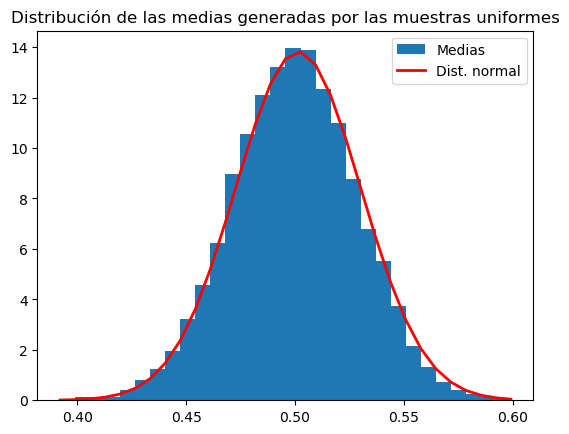

In [12]:
import matplotlib.pyplot as plt

count, bins, ignored = plt.hist(means, 30, density=True, label ='Medias')
sigma = np.sqrt(((1-0)**2)/(12*n))
mu = (1 + sigma/np.sqrt(n))/2
plt.plot(bins, 1/(sigma * np.sqrt(2 * np.pi)) *
               np.exp( - (bins - mu)**2 / (2 * sigma**2) ),
         linewidth=2, color='r', label = 'Dist. normal')
plt.title('Distribución de las medias generadas por las muestras uniformes')
plt.legend()
plt.show()

## Ejercicio 6
Para una de las muestras, contrastar la uniformidad e independencia.

### Contrastando la uniformidad

Podemos contrastar si la distribución es uniforme a través del test de $\chi^2 $. Este test se formula de la siguiente forma: 

- Hipótesis nula ($H_0$): La distribución se produjo de forma uniforme.
- Hipotésis alternativa ($H_1$): La distribución no es uniforme.

Definimos como criterio de rechazo el p-valor. Si el p-valor es mayor que 0.05, aceptamos la hipótesis nula; en caso contrario, la rechazamos.

In [18]:
from scipy import stats

nbins = 4
observed_frequencies, bin_edges = np.histogram(samples[1], 
                            bins=np.linspace(0, 1, nbins+1))

stats.chisquare(f_obs=observed_frequencies)

Power_divergenceResult(statistic=3.6, pvalue=0.3080221715589928)

En este caso, el p-valor es mayor a 0.05, que es más que suficiente para no rechazar la hipótesis nula, y por tanto, se puede considerar que la muestra sigue una distribución uniforme.

Del mismo modo, el **Test de Kolmogorov – Smirnov**, permite también comprobar la uniformidad de una muestra. Este test determina la bondad de ajuste de dos distribuciones de probabilidad entre sí. Si comparamos la muestra con una distribución "canónicamente" uniforme

In [17]:
import numpy as np
from scipy import stats

# por defecto es 'two-sided', es decir, bilateral.
stats.kstest(samples[1], stats.uniform.cdf)

KstestResult(statistic=0.10870845594303669, pvalue=0.1747154289183216, statistic_location=0.5212915440569633, statistic_sign=1)

Que con un p-valor mayor a 0.05, permite no rechazar la hipótesis nula, y obtener la misma conclusión que con el test de la $\chi^2$ cuadrado. Dado que ambos tests nos han dado resultados similares, podemos reafirmar la conclusión de que **la muestra sigue una distribución uniforme**.

### Contrastando la independencia

Para contrastar si la distribución es independiente (es decir, es aleatoria conforme a que los datos se han generado de manera aleatoria e independiente) se puede utilizar el test o la **Prueba de Rachas**. Esta prueba dicta lo siguiente:

- Hipótesis nula, $H_0$: Las muestras han sido generadas aleatoriamente.
- Hipótesis alternativa, $H_1$: Las muestras no han sido generadasa aleatoriamente

Definimos como criterio de rechace o aceptación de la hipótesis nula el p-valor. Si el p-valor es mayor que 0.05, aceptamos la hipótesis nula; en caso contrario, la rechazamos (es decir, tomamos como válida la hipótesis alternativa)

In [16]:
from statsmodels.sandbox.stats.runs import runstest_1samp
[Z_statistic, p_value] = runstest_1samp(samples[1], 
                                        correction=False)
p_value

0.5351674464880596

El p-valor obtenido permite no rechazar la hipótesis nula, es decir, **la muestra ha generado valores aleatoriamente independientes**.